CSVファイルを読み込みます: G:\共有ドライブ\GAP_長寿研\user\iwamoto\視線の動きの俊敏さ\features_0509k_smote_outliers_n733_20250512_170306\predictions_catboostregressor_smote_outliers.csv
データプレビュー:
   Unnamed: 0 InspectionDateAndId  True_Value  Predicted_Value     Error  \
0           0    synthetic_000405   21.000835        21.076320 -0.075484   
1           1    synthetic_000488   23.358142        23.018011  0.340131   
2           2    synthetic_000462   29.785745        28.492056  1.293689   
3           3    synthetic_000317   21.097675        21.265288 -0.167613   
4           4    synthetic_000472   20.996184        21.093496 -0.097313   

   Abs_Error  
0   0.075484  
1   0.340131  
2   1.293689  
3   0.167613  
4   0.097313  

データサマリー:
データ数: 154
True_Value 平均: 24.38, 標準偏差: 3.47
Predicted_Value 平均: 24.43, 標準偏差: 2.88
画像を保存しました: G:\共有ドライブ\GAP_長寿研\user\iwamoto\視線の動きの俊敏さ\features_0509k_smote_outliers_n733_20250512_170306\predictions_catboostregressor_smote_outliers_analysis.png


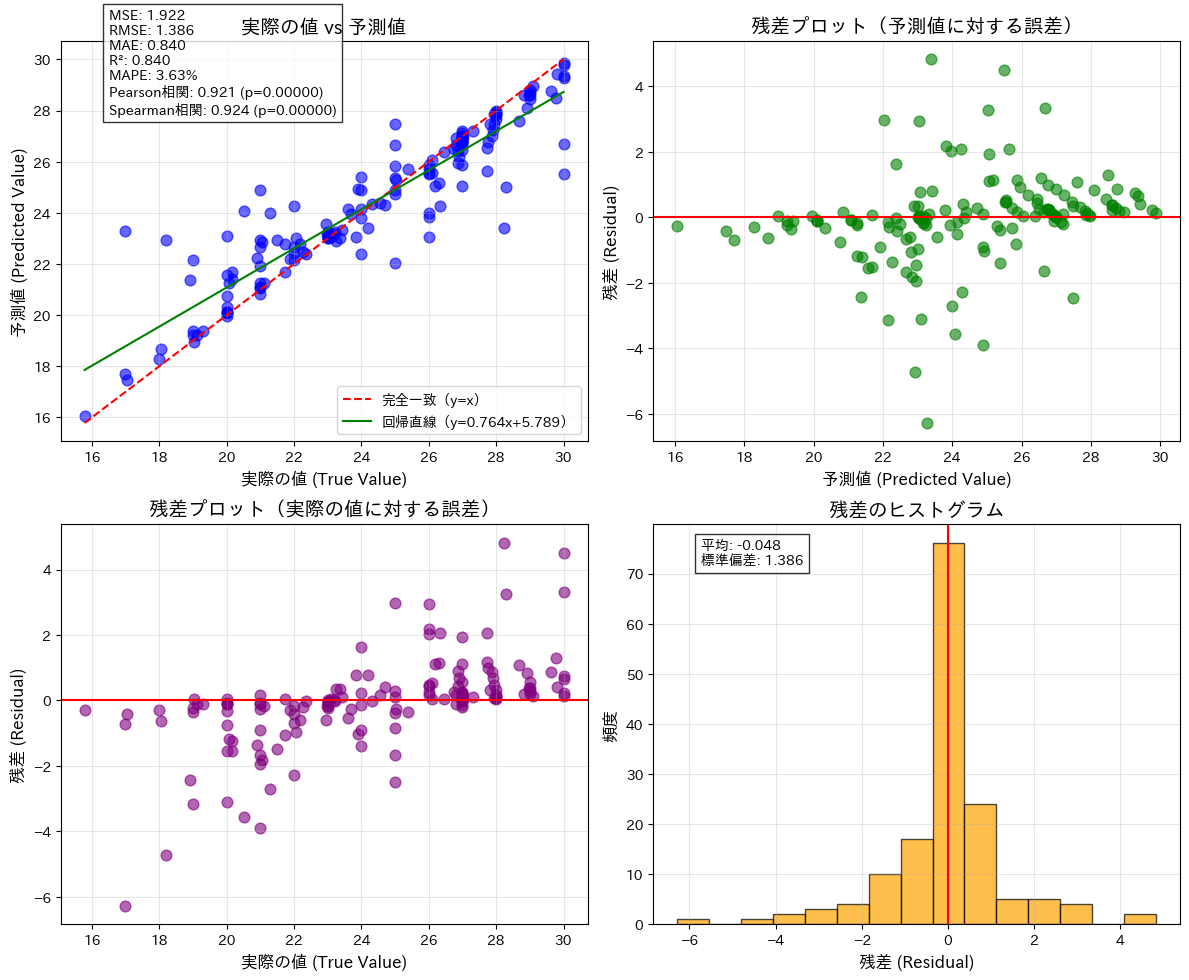


評価指標:
平均二乗誤差 (MSE): 1.922
平方根平均二乗誤差 (RMSE): 1.386
平均絶対誤差 (MAE): 0.840
平均絶対パーセント誤差 (MAPE): 3.63%
決定係数 (R²): 0.840
Pearsonの相関係数: 0.921 (p値: 0.00000)
Spearmanの相関係数: 0.924 (p値: 0.00000)
残差の平均: -0.048
残差の標準偏差: 1.386
最大誤差: 6.286


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import japanize_matplotlib
from scipy import stats  # 相関係数計算のために追加

# 指定されたパスを設定
output_dir = r"G:\共有ドライブ\GAP_長寿研\user\iwamoto\視線の動きの俊敏さ\features_0509k_smote_outliers_n733_20250512_170529"

csv_file_path = r"G:\共有ドライブ\GAP_長寿研\user\iwamoto\視線の動きの俊敏さ\features_0509k_smote_outliers_n733_20250512_170529\predictions_catboostregressor_smote_outliers.csv"

# CSVファイルを読み込む
def load_and_plot_data(csv_file_path, true_col='True_Value', pred_col='Predicted_Value', output_path=None):
    """
    CSVファイルを読み込み、True_ValueとPredicted_Valueの散布図を描画する関数
    
    Parameters:
    -----------
    csv_file_path : str
        CSVファイルのパス
    true_col : str
        実際の値が格納されている列名
    pred_col : str
        予測値が格納されている列名
    output_path : str
        出力ファイルのパス (Noneの場合は出力ディレクトリにデフォルト名で保存)
    """
    try:
        # CSVファイルの読み込み
        df = pd.read_csv(csv_file_path)
        
        # データフレームの最初の数行を表示して確認
        print("データプレビュー:")
        print(df.head())
        
        # 必要なカラムがあるか確認
        if true_col not in df.columns or pred_col not in df.columns:
            print(f"CSVファイルには {true_col} と {pred_col} の列が必要です")
            print(f"利用可能な列: {', '.join(df.columns)}")
            return
        
        # データの抽出
        true_values = df[true_col].values
        predicted_values = df[pred_col].values
        
        # データのサマリーを表示
        print("\nデータサマリー:")
        print(f"データ数: {len(true_values)}")
        print(f"{true_col} 平均: {np.mean(true_values):.2f}, 標準偏差: {np.std(true_values):.2f}")
        print(f"{pred_col} 平均: {np.mean(predicted_values):.2f}, 標準偏差: {np.std(predicted_values):.2f}")
        
        # 評価指標の計算
        mse = mean_squared_error(true_values, predicted_values)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(true_values, predicted_values)
        r2 = r2_score(true_values, predicted_values)
        
        # 相関係数の計算（Pearsonとスピアマン）
        pearson_corr, pearson_p = stats.pearsonr(true_values, predicted_values)
        spearman_corr, spearman_p = stats.spearmanr(true_values, predicted_values)
        
        # MAPEの計算（ゼロ除算を避けるため）
        # ゼロ値がある場合の処理
        non_zero_indices = true_values != 0
        if np.sum(non_zero_indices) > 0:
            mape = np.mean(np.abs((true_values[non_zero_indices] - predicted_values[non_zero_indices]) / true_values[non_zero_indices])) * 100
        else:
            mape = float('nan')  # すべての真値がゼロの場合
        
        # 図の設定
        plt.figure(figsize=(12, 10))
        
        # 1. 散布図
        plt.subplot(2, 2, 1)
        plt.scatter(true_values, predicted_values, alpha=0.6, s=60, c='blue')
        
        # 完全一致線
        min_val = min(min(true_values), min(predicted_values))
        max_val = max(max(true_values), max(predicted_values))
        plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='完全一致（y=x）')
        
        # 回帰直線
        z = np.polyfit(true_values, predicted_values, 1)
        p = np.poly1d(z)
        plt.plot(np.array([min_val, max_val]), p(np.array([min_val, max_val])), 'g-', 
                 label=f'回帰直線（y={z[0]:.3f}x+{z[1]:.3f}）')
        
        plt.xlabel('実際の値 (True Value)', fontsize=12)
        plt.ylabel('予測値 (Predicted Value)', fontsize=12)
        plt.title('実際の値 vs 予測値', fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.legend()
        
        # テキスト情報を追加
        plt.text(min_val + (max_val-min_val)*0.05, max_val - (max_val-min_val)*0.15, 
                 f'MSE: {mse:.3f}\nRMSE: {rmse:.3f}\nMAE: {mae:.3f}\nR²: {r2:.3f}\nMAPE: {mape:.2f}%\n'
                 f'Pearson相関: {pearson_corr:.3f} (p={pearson_p:.5f})\nSpearman相関: {spearman_corr:.3f} (p={spearman_p:.5f})', 
                 fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
        
        # 2. 残差プロット
        plt.subplot(2, 2, 2)
        residuals = true_values - predicted_values
        plt.scatter(predicted_values, residuals, alpha=0.6, s=60, c='green')
        plt.axhline(y=0, color='r', linestyle='-')
        plt.xlabel('予測値 (Predicted Value)', fontsize=12)
        plt.ylabel('残差 (Residual)', fontsize=12)
        plt.title('残差プロット（予測値に対する誤差）', fontsize=14)
        plt.grid(True, alpha=0.3)
        
        # 3. 実際の値に対する残差プロット
        plt.subplot(2, 2, 3)
        plt.scatter(true_values, residuals, alpha=0.6, s=60, c='purple')
        plt.axhline(y=0, color='r', linestyle='-')
        plt.xlabel('実際の値 (True Value)', fontsize=12)
        plt.ylabel('残差 (Residual)', fontsize=12)
        plt.title('残差プロット（実際の値に対する誤差）', fontsize=14)
        plt.grid(True, alpha=0.3)
        
        # 4. 残差のヒストグラム
        plt.subplot(2, 2, 4)
        plt.hist(residuals, bins=15, alpha=0.7, color='orange', edgecolor='black')
        plt.axvline(x=0, color='r', linestyle='-')
        plt.xlabel('残差 (Residual)', fontsize=12)
        plt.ylabel('頻度', fontsize=12)
        plt.title('残差のヒストグラム', fontsize=14)
        plt.grid(True, alpha=0.3)
        
        # 統計情報を追加
        mean_residual = np.mean(residuals)
        std_residual = np.std(residuals)
        plt.text(min(residuals) + (max(residuals)-min(residuals))*0.05, 
                 plt.gca().get_ylim()[1] * 0.9, 
                 f'平均: {mean_residual:.3f}\n標準偏差: {std_residual:.3f}', 
                 fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
        
        plt.tight_layout()
        
        # 出力ファイルのパスを設定
        if output_path is None:
            # ファイル名を入力ファイルから作成
            base_filename = os.path.basename(csv_file_path)
            filename_without_ext = os.path.splitext(base_filename)[0]
            output_path = os.path.join(output_dir, f"{filename_without_ext}_analysis.png")
        
        # 画像ファイルとして保存
        plt.savefig(output_path)  
        print(f"画像を保存しました: {output_path}")
        plt.show()
        
        # 追加の統計情報を出力
        print("\n評価指標:")
        print(f"平均二乗誤差 (MSE): {mse:.3f}")
        print(f"平方根平均二乗誤差 (RMSE): {rmse:.3f}")
        print(f"平均絶対誤差 (MAE): {mae:.3f}")
        print(f"平均絶対パーセント誤差 (MAPE): {mape:.2f}%")
        print(f"決定係数 (R²): {r2:.3f}")
        print(f"Pearsonの相関係数: {pearson_corr:.3f} (p値: {pearson_p:.5f})")
        print(f"Spearmanの相関係数: {spearman_corr:.3f} (p値: {spearman_p:.5f})")
        print(f"残差の平均: {mean_residual:.3f}")
        print(f"残差の標準偏差: {std_residual:.3f}")
        print(f"最大誤差: {max(abs(residuals)):.3f}")
        
        return df, true_values, predicted_values
        
    except Exception as e:
        print(f"エラーが発生しました: {e}")
        return None, None, None

# 使用例
if __name__ == "__main__":
    # 出力ディレクトリの存在確認と作成
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"出力ディレクトリを作成しました: {output_dir}")
    
    # 指定されたCSVファイルを読み込んで可視化
    print(f"CSVファイルを読み込みます: {csv_file_path}")
    load_and_plot_data(csv_file_path)

In [2]:
pip install japanize_matplotlib

  Using cached japanize-matplotlib-1.1.3.tar.gz (4.1 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120324 sha256=c4e7e9ddeef866fb655164e38c3f0e4e37ee89c72656d6ffacda9c2aef3b6fa1
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\61\7a\6b\df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib
Note: you may need to restart the kernel to use updated packages.
